In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

# ignore harmless warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir("drive/MyDrive/kalbe dataset")

# Load data and data cleansing

### product

In [4]:
product = pd.read_csv('Product.csv', sep=';')
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [5]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [6]:
product.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

### customer

In [7]:
customer = pd.read_csv('Customer.csv', sep=';')
customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [9]:
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [10]:
customer["Gender"] = customer['Gender'].astype('object')

In [11]:
customer['Income'] = customer['Income'].replace(',','.',regex=True)

In [12]:
customer["Income"] = customer['Income'].astype(float)

In [13]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    object 
 3   Marital Status  444 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 17.6+ KB


In [14]:
# fill missing value with the most frequent value of that column
customer['Marital Status']=customer['Marital Status'].fillna(customer['Marital Status'].mode()[0])

In [15]:
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

### transaction

In [16]:
transaction = pd.read_csv('Transaction.csv', sep=';')
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [17]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [18]:
transaction.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

### store

In [19]:
store = pd.read_csv('Store.csv', sep=';')
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [20]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [21]:
store.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

# Merging all data

In [22]:
df_merged = pd.merge(transaction, product, on='ProductID', how='left')
df_merged = pd.merge(df_merged, store, on='StoreID', how='left')
df_merged = pd.merge(df_merged, customer, on='CustomerID', how='left')

In [23]:
df_merged.isnull().sum()

TransactionID     0
CustomerID        0
Date              0
ProductID         0
Price_x           0
Qty               0
TotalAmount       0
StoreID           0
Product Name      0
Price_y           0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

# Data preparation

In [24]:
df = df_merged.groupby('CustomerID').agg({'TransactionID':['count'],
                                          'Qty':['sum'],
                                          'TotalAmount':['sum']}).reset_index()
df.columns = ['CustomerID','TransactionID','Quantity','Total Amount']
df.head()

,CustomerID,TransactionID,Quantity,Total Amount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


### Feature scaling

Feature slection for the model. Considering only 2 features (**Quantity and Total Amount**)

In [25]:
X = df.iloc[:,[2,3]].values

In [26]:
# scaling using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
scaled_data = scaler.fit_transform(X)

# Modelling

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# KMeans clustering

**Finding the number of clusters using elbow method**

In [28]:
K = range(1,12)
wss = []
for k in K:
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(X)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [29]:
wss_iter

105089801036.72629

We Store the Number of clusters along with their WSS Scores in a DataFrame

In [30]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,6.928032e+12
1,2,2.434755e+12
2,3,1.233001e+12
3,4,7.766454e+11
4,5,5.042323e+11
5,6,3.812536e+11
6,7,2.779700e+11
7,8,2.129177e+11
8,9,1.712838e+11
9,10,1.377122e+11


<Axes: xlabel='Clusters', ylabel='WSS'>

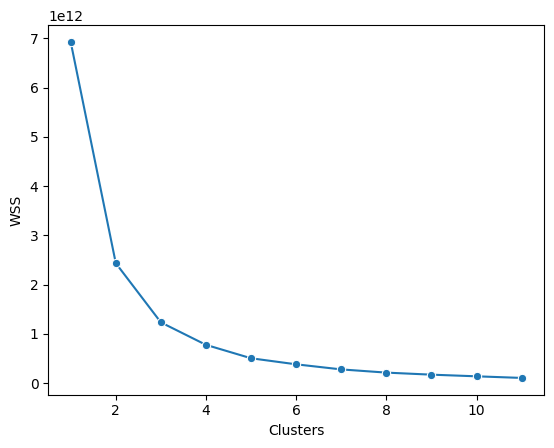

In [31]:
sns.lineplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="o")

So, from this we see that **the optimum value of K for this generated data is 3** because for K value of 3 and above the fluctuations in wcss is not happening much.

Now here's comes the Silhouette. Let's use it to check out the best K value for our clustering algorithm.

For n_clusters = 2 The average silhouette_score is : 0.5634481545384639
For n_clusters = 3 The average silhouette_score is : 0.5391208505196545
For n_clusters = 4 The average silhouette_score is : 0.5200001192732446
For n_clusters = 5 The average silhouette_score is : 0.5376406043497329
For n_clusters = 6 The average silhouette_score is : 0.5138904283581923


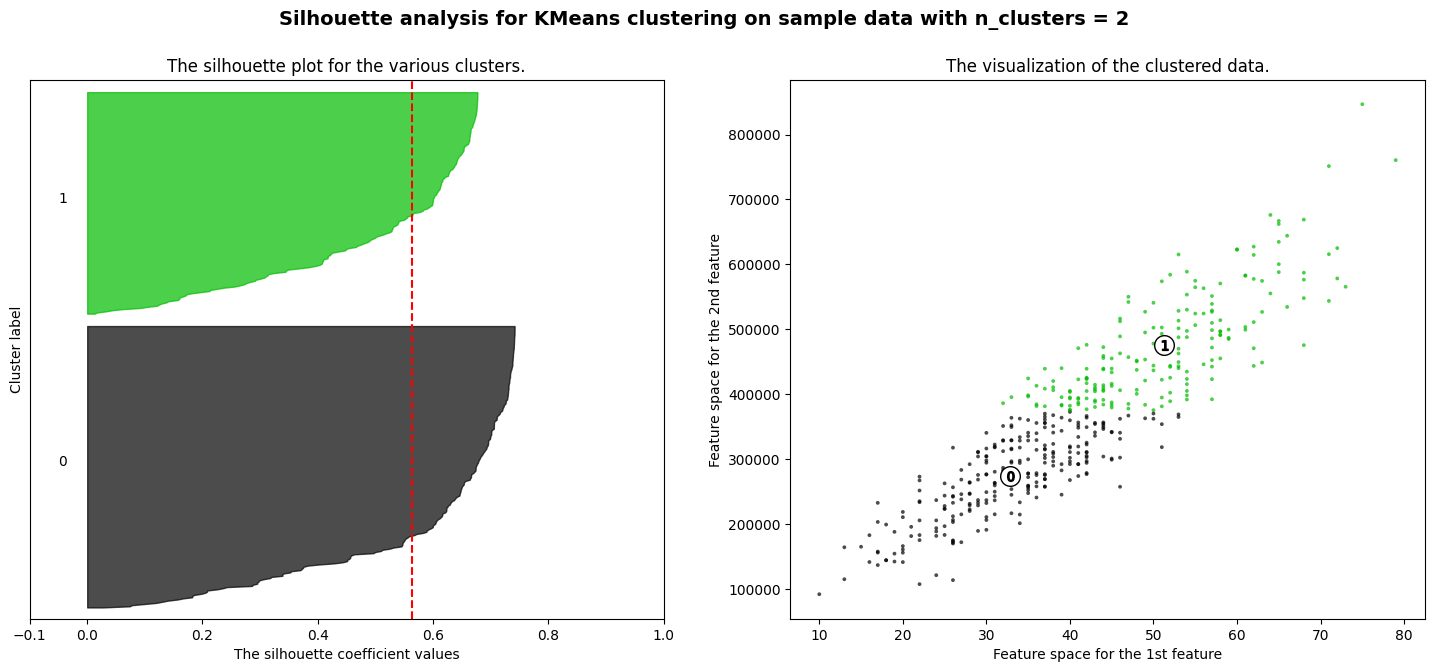

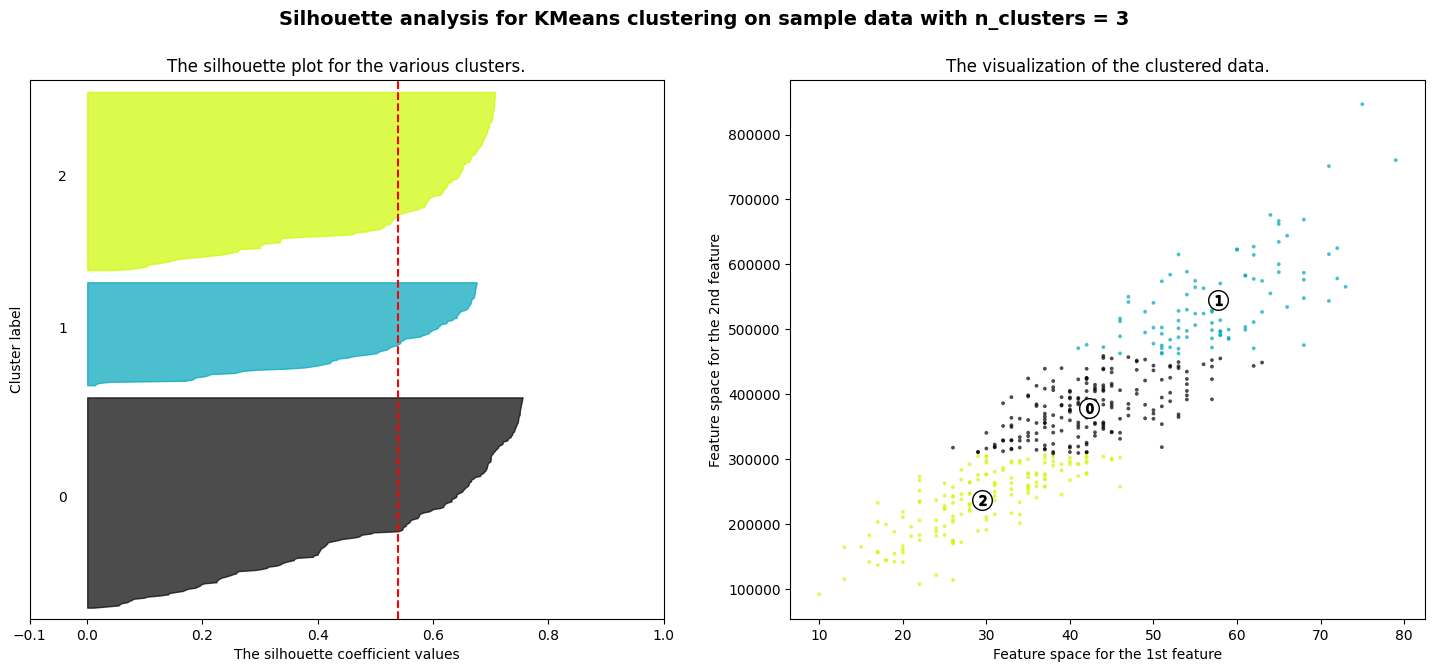

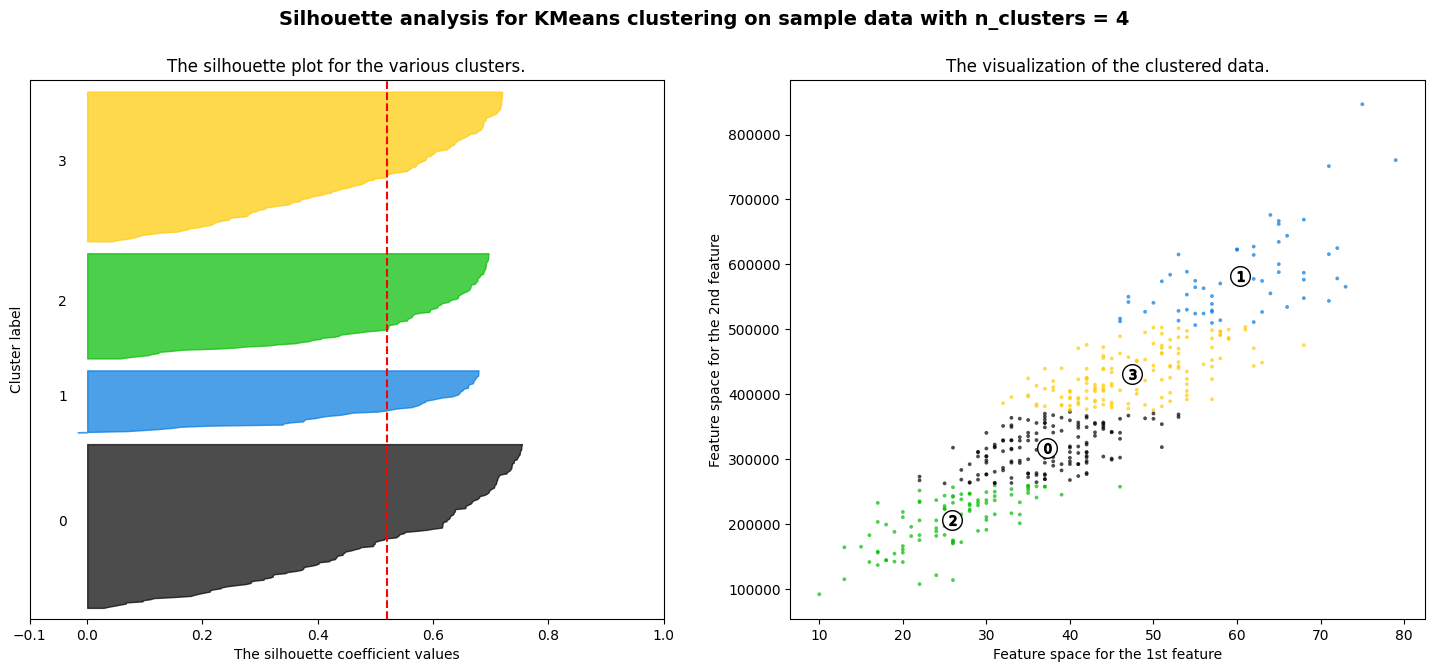

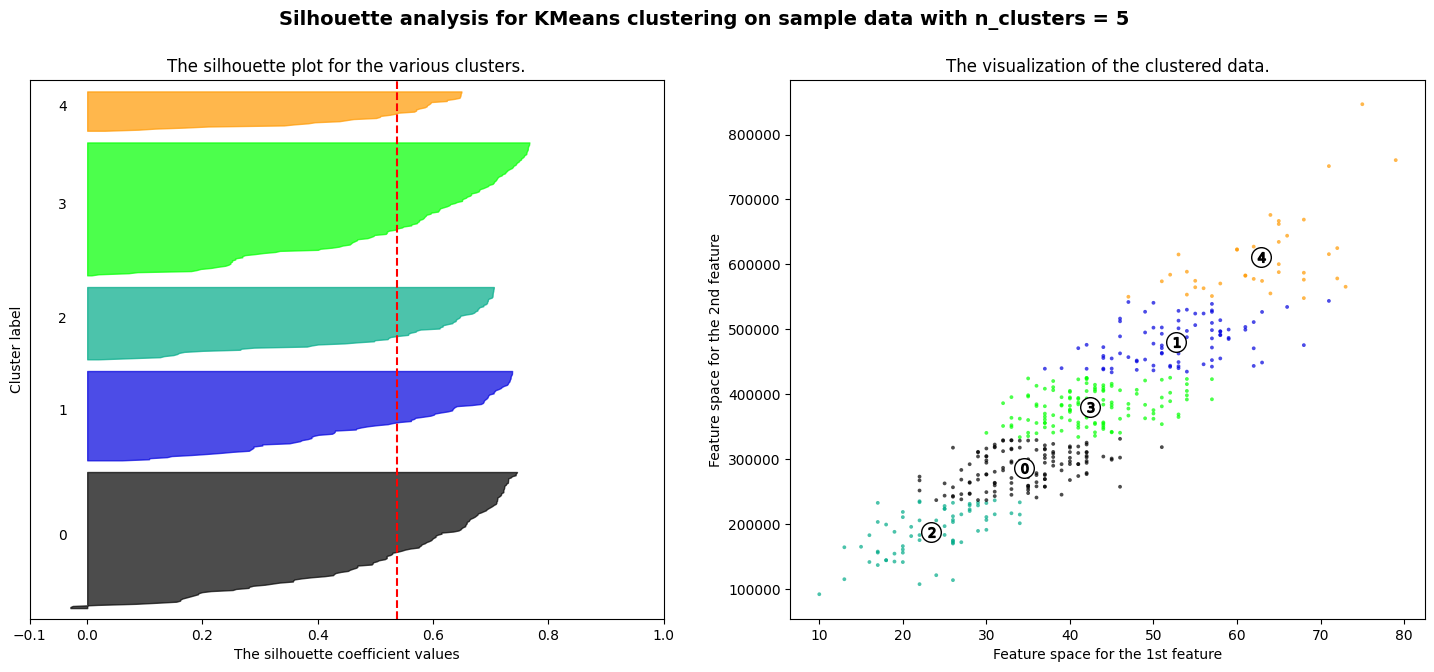

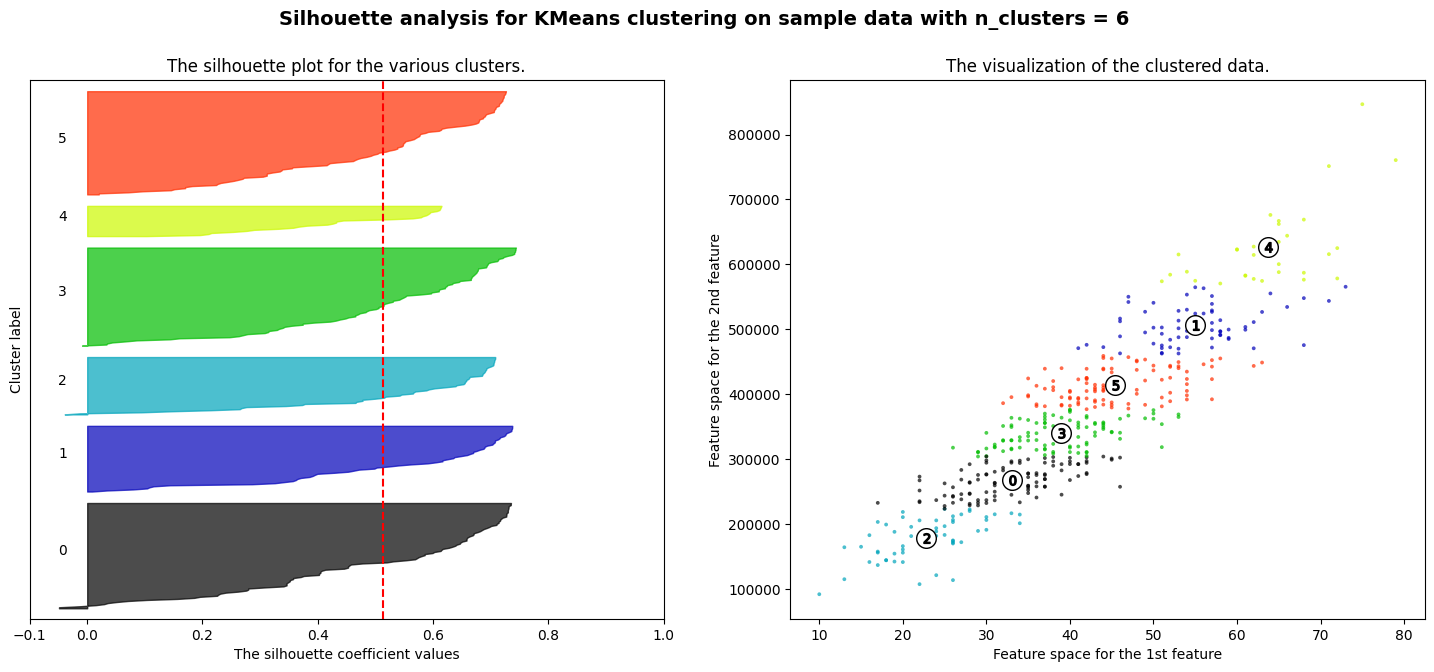

In [32]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**Both elbow and silhouette score got different result**, but I still **choose elbow (K=3)** because the calculation simplicity of elbow makes it more suited than silhouette score for datasets with smaller size or time complexity.

## Applying cluster K=3

In [33]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

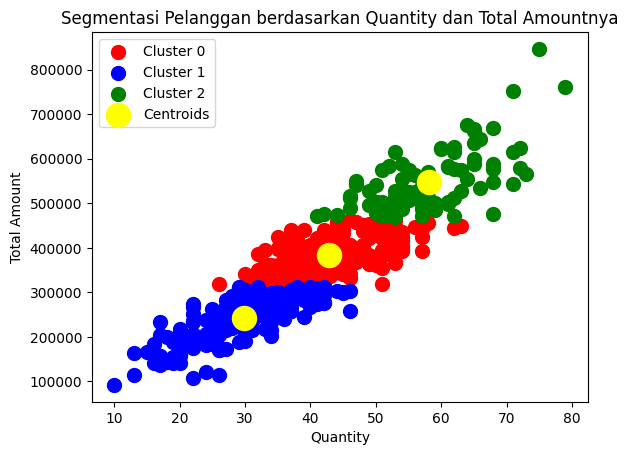

In [34]:
#Visualizing all the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Segmentasi Pelanggan berdasarkan Quantity dan Total Amountnya')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

In [35]:
# Convert the NumPy array into a DataFrame
new_data = pd.DataFrame(y_kmeans, columns=['Cluster'])

# Concatenate the new DataFrame with the existing DataFrame
combined_df = pd.concat([df, new_data], axis=1)

combined_df.head()

,CustomerID,TransactionID,Quantity,Total Amount,Cluster
0,1,17,60,623300,2
1,2,13,57,392300,0
2,3,15,56,446200,0
3,4,10,46,302500,1
4,5,7,27,268600,1


In [36]:
df_cluster_mean = combined_df.groupby('Cluster').agg({'CustomerID':'count',
                                                     'TransactionID':'mean',
                                                     'Quantity':'mean',
                                                     'Total Amount':'mean'})
df_cluster_mean.sort_values('CustomerID', ascending = False)

,CustomerID,TransactionID,Quantity,Total Amount
Cluster,,,,
0,186,11.752688,42.779570,384003.225806
1,171,8.508772,29.888889,241425.730994
2,90,15.322222,58.088889,548162.222222


# Recommendations

About cluster number 0 :

*   Memiliki jumlah customer paling banyak
*   List item

